In [2]:
# block_path = '/mnt/cube/ephys-example-data/Pen01_Lft_AP2500_ML1350__Site10_Z2026__B997_cat_P01_S10_Epc10/'
block_path = '/mnt/cube/ephys-example-data/Pen01_Lft_AP100_ML1300__Site03_Z2500__B1056_cat_P01_S03_1/'
# block_path = '/mnt/cube/ephys-example-data/Pen04_Lft_AP2555_ML500__Site02_Z2688__st979_cat_P04_S02_1/'

First, let's load the clusters.

In [1]:
from ephys import core

In [3]:
clusters = core.get_clusters(block_path)
print clusters.head()

   cluster quality
0        0   Noise
1        2     MUA
2        3    Good
3        4    Good
4        6     MUA


Let's check the distribution of cluster values.

In [4]:
clusters.quality.value_counts()

Good        28
unsorted    24
MUA         17
Noise        2
Name: quality, dtype: int64

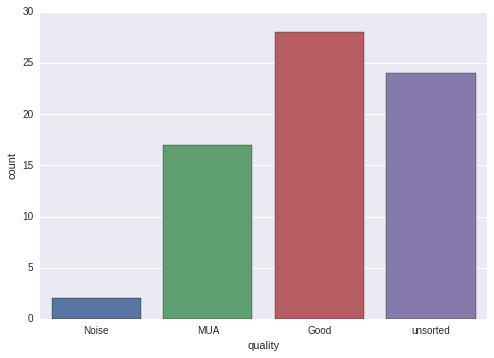

In [5]:
%matplotlib inline
import seaborn as sns

sns.countplot('quality',data=clusters)

Sweet! Let's get a new dataframe without the noise or unsorted clusters

In [6]:
neurons = (
    clusters[clusters.quality.isin(['Good','MUA'])]
    .sort_values(['quality','cluster'])
    .reset_index()
)
print neurons.quality.unique()


['Good' 'MUA']


Nice! Now, let's compute some metrics.

In [7]:
from ephys import clust

neurons['width'] = neurons['cluster'].map(
    lambda clu: clust.get_width(block_path,clu)
)

print neurons.head()

   index  cluster quality     width
0      2        3    Good  0.000546
1      3        4    Good  0.000432
2      7        9    Good  0.000202
3     10       13    Good  0.000698
4     11       15    Good  0.000389


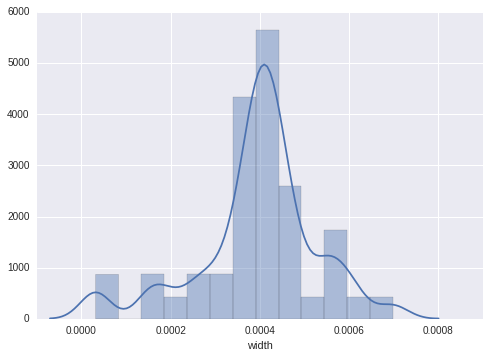

In [8]:
sns.distplot(neurons['width'])

In [9]:
neurons['x_probe'] = neurons['cluster'].map(
    lambda clu: clust.get_cluster_coords(block_path,clu,weight_func=clust.mean_masks_w)[0]
)
neurons['y_probe'] = neurons['cluster'].map(
    lambda clu: clust.get_cluster_coords(block_path,clu,weight_func=clust.mean_masks_w)[1]
)

(-0.0060000000000000001, 0.0060000000000000001, -100.0, 800.0)

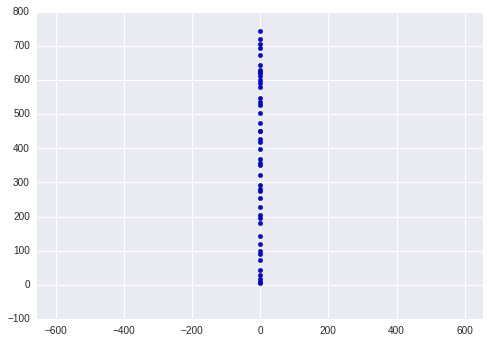

In [10]:
import matplotlib.pyplot as plt
plt.scatter(neurons['x_probe'],neurons['y_probe'])
plt.axis('equal')

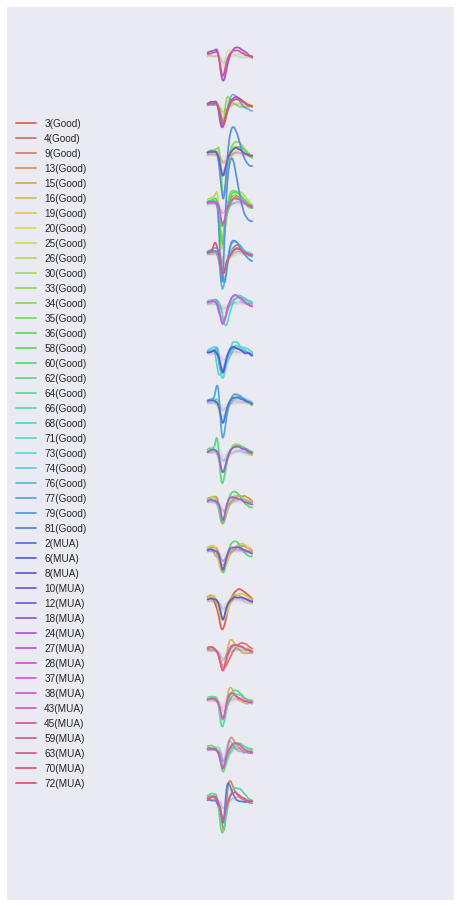

In [11]:
from ephys import viz
f,ax = plt.subplots(1,1,figsize=(8,16))
viz.plot_all_clusters(block_path,neurons,scale_factor=0.01)